### Analysis of the 3jj bifluxon qubit
***

###### Imports

In [1]:
%matplotlib widget

In [2]:
# Numpy
import numpy as np

# Bifluxon
import tribf as tbf
from importlib import reload

# Matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Image, Markdown


# Warnings
import warnings, matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [12]:
reload(tbf)

<module 'tribf' from 'e:\\OneDrive - Rutgers University\\files_GitHub\\Bifluxon\\ 2-island bf\\tribf.py'>

##### Circuit parameters (capacitances in [fF], inductances in [nH], frequencies in [GHz], temperature in [K], impedance in [Ω])

In [3]:

circuit_params    = {'φext': 0.5*2*np.pi, 'ng': 0., 'ng1': 0., 'ng2': 0.5,
                     'CJ': 0.321, 'Cg': 0.98,
                     'C0': 1.53, 'C0c': 1.98,
                     'LJ': 4.40,
                     'L': 600.01,
                     'dEJ': 0.297,
                    
                     'T_loss': 0.05, 'QC': 3.8e5, 'QL': 5.e8,
                     'T_line': 2., 'Renv': 50.,
                     'ηsh': 0.15, 'ωr': 6.96, 'Zr': 50., 'Qr': 5.3e3}

###### Mode parameters

In [15]:
mparams = tbf.mode_params(**circuit_params)

In [5]:
# Cφ, and corresponding charging energy
print('Cφ = {} fF and ECφ = {} GHz'.format(mparams['Cφ1'], tbf.fF2GHz / mparams['Cφ1']))

# Cφ-, and corresponding charging energy
print('Cφ- = {} fF and ECφ- = {} GHz'.format(mparams['Cφ-'], tbf.fF2GHz / mparams['Cφ-']))

# EJ and EL
print('2EJ = {} GHz and EL = {}  GHz'.format(2. * tbf.nH2GHz / mparams['LJ'], tbf.nH2GHz / mparams['L']))

Cφ = 3.504551878302774 fF and ECφ = 5.527163150280099 GHz
Cφ- = 1.086 fF and ECφ- = 17.836307550644566 GHz
2EJ = 74.30068181818181 GHz and EL = 0.27243129281178646  GHz


###### Sweep parameters

In [6]:
mparams['βφ1']

0.2796363227114235

In [6]:
nH2GHz = 163.4615  # Inductive enegry in GHz (per L in nH) 
fF2GHz = 19.37023  # Capacitive enegry in GHz (per C in fF)
Z2z    = 0.1549618 # Reduced impedance z=Z/RQ (times Z in sqrt(L in nH / C in fF)), with RQ = h/(2e)**2 superconducting resistance quantum
ω2GHz  = 159.15494 # Frequency for L = 1 nH and C = 1 fH in GHz
z2Ω    = 1000.     # Impedance for L = 1 nH and C = 1 fH in Ω
K2GHz  = 20.8366   # Temperature in GHz (times T in K)


# Resonator parameters
ηsh    = circuit_params['ηsh']
ωr, Zr = circuit_params['ωr'], circuit_params['Zr']

g = ηsh * (nH2GHz / mparams['L']) * np.sqrt(np.pi * Z2z * Zr)

print(g)

0.20161392063233438


In [7]:
φexts = np.linspace(-0.0, np.pi, 41, endpoint=True)
ngs   = np.linspace(-0.0, 1, 51, endpoint=True)

### Charge sweep

In [14]:
circuit_params['φext']    = np.pi
circuit_params['ng2']     = 1/3
circuit_params['CJ']      = 4e-3

In [16]:
sweep  = tbf.sweep(tbf.diagonalize_device, 'ng1', ngs, **circuit_params)

0.0 3.478224030915193
0.02 3.423282634703785
0.04 3.3661861549069734
0.06 3.3071202923198015
0.08 3.246296178638218
0.1 3.183958334322419
0.12 3.120393862618073
0.14 3.055942724942877
0.16 2.9910088073469296
0.18 2.9260712994667486
0.2 2.861695653355433
0.22 2.7985430618065408
0.24 2.7373769999061786
0.26 2.679064941394927
0.28 2.6245729688628323
0.3 2.57495078116278
0.32 2.5313047676753193
0.34 2.4947576138608483
0.36 2.466394532130611
0.38 2.4471986952491953
0.4 2.4379814470291343
0.42 2.439315597909964
0.44 2.4514815159882772
0.46 2.4744348887246375
0.48 2.507801759816946
0.5 2.5509015439714986
0.52 2.602793723998566
0.54 2.6623403765981806
0.56 2.728275382560188
0.58 2.799272028858958
0.6 2.8740029114348786
0.62 2.9511886499647844
0.64 3.0296342207894966
0.66 3.1082533660608718
0.68 3.18608251576887
0.7000000000000001 3.2622860978814323
0.72 3.336155187190524
0.74 3.407101309087299
0.76 3.474646978986886
0.78 3.5384142884706904
0.8 3.5981125824994535
0.8200000000000001 3.6535260271

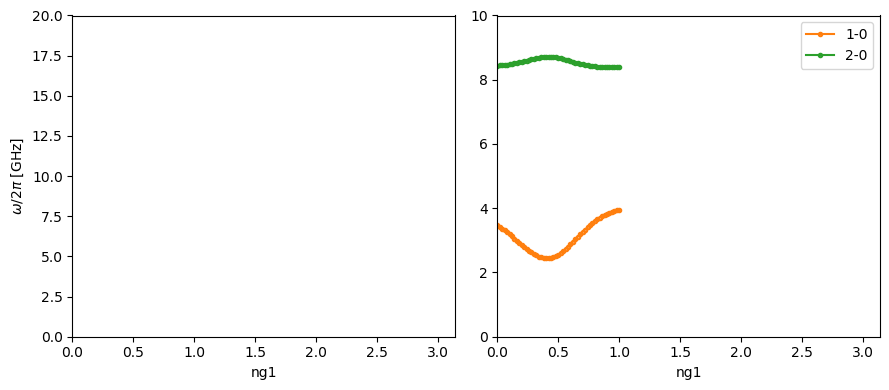

In [18]:
tbf.plot_spectrum(sweep, ωmaxinGHz2=[0,10.])

In [21]:
X, Y0 = sweep['vector'], [evals[0] for evals, ekets in sweep['result']]
Y1 = [evals[1] for evals, ekets in sweep['result']]
fig, ax = plt.subplots()

ax.plot(X, Y0, label = 'E0')
ax.plot(X, Y1, label = 'E1')

ax.set_title('ng2 = 1/6')

ax.set_xlabel('ng1')
ax.set_ylabel('E')

ax.legend()

FigureCanvasNbAgg()

In [45]:
X, Y01 = sweep['vector'], [evals[1] - evals[0] for evals, ekets in sweep['result']]
# Y1 = [evals[1] for evals, ekets in sweep['result']]
fig, ax = plt.subplots()

ax.plot(X, Y01, label = 'E01')


ax.set_title('ng2 = 1/6')

ax.set_xlabel('ng1')
ax.set_ylabel('E01')

ax.legend()

FigureCanvasNbAgg()

## 2d sweep

In [ ]:
sweep_ngng1 = tbf.DoubleSweep(tbf.diagonalize_device, 'ng1', 'ng2', ngs, ngs, **circuit_params)

In [11]:
tbf.plot_DoubleSpectrum(sweep_ngng1, title='pls work', 
                        ωliminGHz=[0,20.], xrange=None,yrange=None,state=0, diff=True)

state is 0
(51, 51, 2, 16)


FigureCanvasNbAgg()

In [10]:
tbf.write_double(sweep_ngng1, filename='march12')